In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid', palette='coolwarm', font_scale=1.5)

# Importing Data

In [2]:
# Importing data from flat file - CSV
# Creating Pandas DataFrame from CSV
df = pd.read_csv('acquisitions_update_2021.csv')

In [3]:
# Quick representation of data, ensuring all Columns and data are present at beginning of DataFrame
df.head()

ID Parent Company Acquisition Year Acquisition Month  \
0   1          Apple             1988               Mar   
1   2          Apple             1988               Jun   
2   3          Apple             1988               Jun   
3   4          Apple             1988               Jul   
4   5          Apple             1989               Jan   

        Acquired Company           Business Country Acquisition Price  \
0    Network Innovations           Software       -                 -   
1  Orion Network Systems  Computer Software       -                 -   
2              Styleware  Computer software       -                 -   
3        Nashoba Systems  Computer software       -                 -   
4         Coral Software  Computer software       -                 -   

  Category Derived Products  
0        -                -  
1        -                -  
2        -                -  
3        -                -  
4        -                -

In [4]:
# Quick representation of data, ensuring all Columns and data are present at end of DataFrame
df.tail()

ID Parent Company Acquisition Year Acquisition Month Acquired Company  \
1450  1451         Citrix             2015               Apr      Grasshopper   
1451  1452         Citrix             2016               Sep         Norskale   
1452  1453         Citrix             2017               Jan          Unidesk   
1453  1454         Citrix             2018               Feb          Cedexis   
1454  1455         Citrix             2021               Mar            Wrike   

                                          Business        Country  \
1450                            Telephone services  United States   
1451  UEM and application performance optimization         France   
1452                                             -  United States   
1453                Intelligent traffic management         France   
1454                            Project management  United States   

     Acquisition Price Category  \
1450                 -        -   
1451                 -        -   
1452                 -        -   
1453                 -        -   
1454                 -        -   

                                       Derived Products  
1450  GoToMeeting, GoToTraining, GoToWebinar, ShareF...  
1451                                 XenApp, XenDesktop  
1452                                 XenApp, XenDesktop  
1453                                         Citrix ITM  
1454                                   Citrix Workspace

In [5]:
# DataFrame information - 10 Columns, 1455 Rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1455 non-null   int64 
 1   Parent Company     1455 non-null   object
 2   Acquisition Year   1455 non-null   object
 3   Acquisition Month  1455 non-null   object
 4   Acquired Company   1455 non-null   object
 5   Business           1455 non-null   object
 6   Country            1455 non-null   object
 7   Acquisition Price  1455 non-null   object
 8   Category           1455 non-null   object
 9   Derived Products   1455 non-null   object
dtypes: int64(1), object(9)
memory usage: 113.8+ KB


# Preperation

In [6]:
# Sorting Data by Parent Company in alphabetical order, and by the most recent acquisitions
df = df.sort_values(by=["Parent Company", "Acquisition Year"], ascending = [True, False])
df.head(10)

ID Parent Company Acquisition Year Acquisition Month Acquired Company  \
1255  1256          Adobe             2020               Nov        Workfront   
1254  1255          Adobe             2019               Jan    Allegorithmic   
1250  1251          Adobe             2018               Apr        Sayspring   
1251  1252          Adobe             2018               Apr              Uru   
1252  1253          Adobe             2018               May          Magento   
1253  1254          Adobe             2018               Sep          Marketo   
1248  1249          Adobe             2016               May         Livefyre   
1249  1250          Adobe             2016               Nov        TubeMogul   
1246  1247          Adobe             2015               Jan          Fotolia   
1247  1248          Adobe             2015               Jun           Mixamo   

     Business Country Acquisition Price Category Derived Products  
1255        -       -        1500000000        -                -  
1254        -       -                 -        -                -  
1250        -       -                 -        -                -  
1251        -       -                 -        -                -  
1252        -       -        1680000000        -                -  
1253        -       -        4750000000        -                -  
1248        -       -                 -        -                -  
1249        -       -         540000000        -                -  
1246        -       -         800000000        -                -  
1247        -       -                 -        -                -

In [7]:
# Checking for duplicates: 1455 False = 1455 original rows, therefore no need to drop duplicates
df.duplicated(subset=['Acquired Company', "ID"]).value_counts()

False    1455
dtype: int64

In [8]:
# Further way of showing dropping of duplicates, with the resulting "test" dataframe having an equal number of rows to original DataFrame, therefore no duplicates were dropped
test = df.drop_duplicates(subset=['Acquired Company', "ID"])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 1255 to 124
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1455 non-null   int64 
 1   Parent Company     1455 non-null   object
 2   Acquisition Year   1455 non-null   object
 3   Acquisition Month  1455 non-null   object
 4   Acquired Company   1455 non-null   object
 5   Business           1455 non-null   object
 6   Country            1455 non-null   object
 7   Acquisition Price  1455 non-null   object
 8   Category           1455 non-null   object
 9   Derived Products   1455 non-null   object
dtypes: int64(1), object(9)
memory usage: 125.0+ KB


In [9]:
# Setting ID as index, As I have confirmed each value for ID is unique
df = df.set_index("ID")

In [10]:
# Replacing missing Values 
# Chose this method as there was only 26% acquisition prices present - therefore mean would not be an accurate fill, also replaced both "-" and "undisclosed" with 0 for consistency 
# Also allowing me to replace undisclosed with ease as it is not NaN
df = df.replace("-", 0)
df = df.replace("undisclosed", 0)
df.head(3)

Parent Company Acquisition Year Acquisition Month Acquired Company  \
ID                                                                        
1256          Adobe             2020               Nov        Workfront   
1255          Adobe             2019               Jan    Allegorithmic   
1251          Adobe             2018               Apr        Sayspring   

     Business Country Acquisition Price Category Derived Products  
ID                                                                 
1256        0       0        1500000000        0                0  
1255        0       0                 0        0                0  
1251        0       0                 0        0                0

In [11]:
df.describe()

Parent Company Acquisition Year Acquisition Month Acquired Company  \
count            1455             1455              1455             1455   
unique             14               47                13             1452   
top         Microsoft             2014               Jun          Magento   
freq              258              100               148                2   

        Business  Country  Acquisition Price  Category  Derived Products  
count       1455     1455               1455      1455              1455  
unique       865       26                228        10               236  
top            0        0                  0         0                 0  
freq         274     1114               1072      1445              1052

In [12]:
# Example of Grouping by business, using new DataFrame as original DataFrame has already been Sorted as desired for analysis
df2 = df.groupby("Business")
df2.first()
# Displaying the Software group
df2.get_group("Software")

Parent Company Acquisition Year Acquisition Month  \
ID                                                       
56            Apple             2013               Dec   
25            Apple             2006               Oct   
26            Apple             2006               Dec   
23            Apple             2005               Mar   
11            Apple             2000               Apr   
12            Apple             2000                 0   
8             Apple             1999               Jan   
1             Apple             1988               Mar   
935      Blackberry             2009               Jan   
928      Blackberry             2001               Nov   
1034            Ibm             2003               May   
1035            Ibm             2003               Jul   
1036            Ibm             2003               Jul   
1025            Ibm             2002               Jan   
1030            Ibm             2002               Oct   
923       Microsoft             2021               Jul   
841       Microsoft             2014               Aug   
819       Microsoft             2011               Jun   
813       Microsoft             2009               Sep   
814       Microsoft             2009               Dec   
794       Microsoft             2008               Jan   
795       Microsoft             2008               Feb   
796       Microsoft             2008               Feb   
803       Microsoft             2008               May   
804       Microsoft             2008               Jun   
760       Microsoft             2006               Jan   
762       Microsoft             2006               Feb   
763       Microsoft             2006               Mar   
773       Microsoft             2006               Jul   
750       Microsoft             2005               Mar   
754       Microsoft             2005               Jun   
758       Microsoft             2005               Nov   
740       Microsoft             2003               Feb   
745       Microsoft             2003               Aug   
734       Microsoft             2002               May   
728       Microsoft             2001               May   
731       Microsoft             2001               Jun   
722       Microsoft             2000               Jul   
705       Microsoft             1999               Mar   
716       Microsoft             1999               Oct   
682       Microsoft             1996               Jan   
683       Microsoft             1996               Mar   
684       Microsoft             1996               Mar   
687       Microsoft             1996               Jun   
689       Microsoft             1996               Nov   
679       Microsoft             1995               Oct   
674       Microsoft             1994               Sep   
675       Microsoft             1994               Nov   
676       Microsoft             1994               Nov   
671       Microsoft             1991               Mar   
1367         Redhat             2008               Jun   
1360         Redhat             2002               Oct   

                     Acquired Company  Business        Country  \
ID                                                               
56                          Catch.com  Software              0   
25                      Silicon Color  Software              0   
26                          Proximity  Software              0   
23                         SchemaSoft  Software              0   
11     Astarte-DVD Authoring Software  Software              0   
12                        SoundJam MP  Software              0   
8                   Xemplar Education  Software              0   
1                 Network Innovations  Software              0   
935                       Chalk Media  Software              0   
928                      Plazmic Inc.  Software              0   
1034                   Think Dynamics  Software         Canada   
1035          

# Analysis

In [13]:
# The percentage of rows that have 0 information in each column
for column in df.columns:
    percentage = (df[column] == 0).mean()
    print(f'{column}: {round(percentage*100, 2)}%')

Parent Company: 0.0%
Acquisition Year: 1.92%
Acquisition Month: 3.99%
Acquired Company: 0.0%
Business: 18.83%
Country: 76.56%
Acquisition Price: 73.68%
Category: 99.31%
Derived Products: 72.3%


In [14]:
# Converting Object to int64 for Acquisition Price Column for calculations
df["Acquisition Price"] = pd.to_numeric(df["Acquisition Price"])
print(df.dtypes)

Parent Company       object
Acquisition Year     object
Acquisition Month    object
Acquired Company     object
Business             object
Country              object
Acquisition Price     int64
Category             object
Derived Products     object
dtype: object


In [15]:
# NumPy functions to gain insights into the amount of money being spent on acquisitions, using the known prices available
print("The total money spent on acquisitions where the price was recorded was: $",df["Acquisition Price"].sum())
print("The highest recorded amount of money spent on a single acquisition was: $",df["Acquisition Price"].max())

# Creating a List of Acquisition Prices for ease of calculations
Prices = df["Acquisition Price"].tolist()
# Removing Acquistion Prices that weren't recorded (0)
Prices = [i for i in Prices if i != 0]
print("The lowest Acquisition Price that was recorded for a Company was: $",min(Prices))

# Python program to get average of a list
def Average(Prices):
    return sum(Prices) / len(Prices)

average = Average(Prices)
print("The average amount of money spent by companys with a recorded acquisition price was: $", round(average, ))

The total money spent on acquisitions where the price was recorded was: $ 519877989500
The highest recorded amount of money spent on a single acquisition was: $ 71300000000
The lowest Acquisition Price that was recorded for a Company was: $ 200000
The average amount of money spent by companys with a recorded acquisition price was: $ 1357383785


<AxesSubplot:title={'center':'Companies with Highest Number of Acquisitions'}, xlabel='Parent Company', ylabel='Acquisitions'>

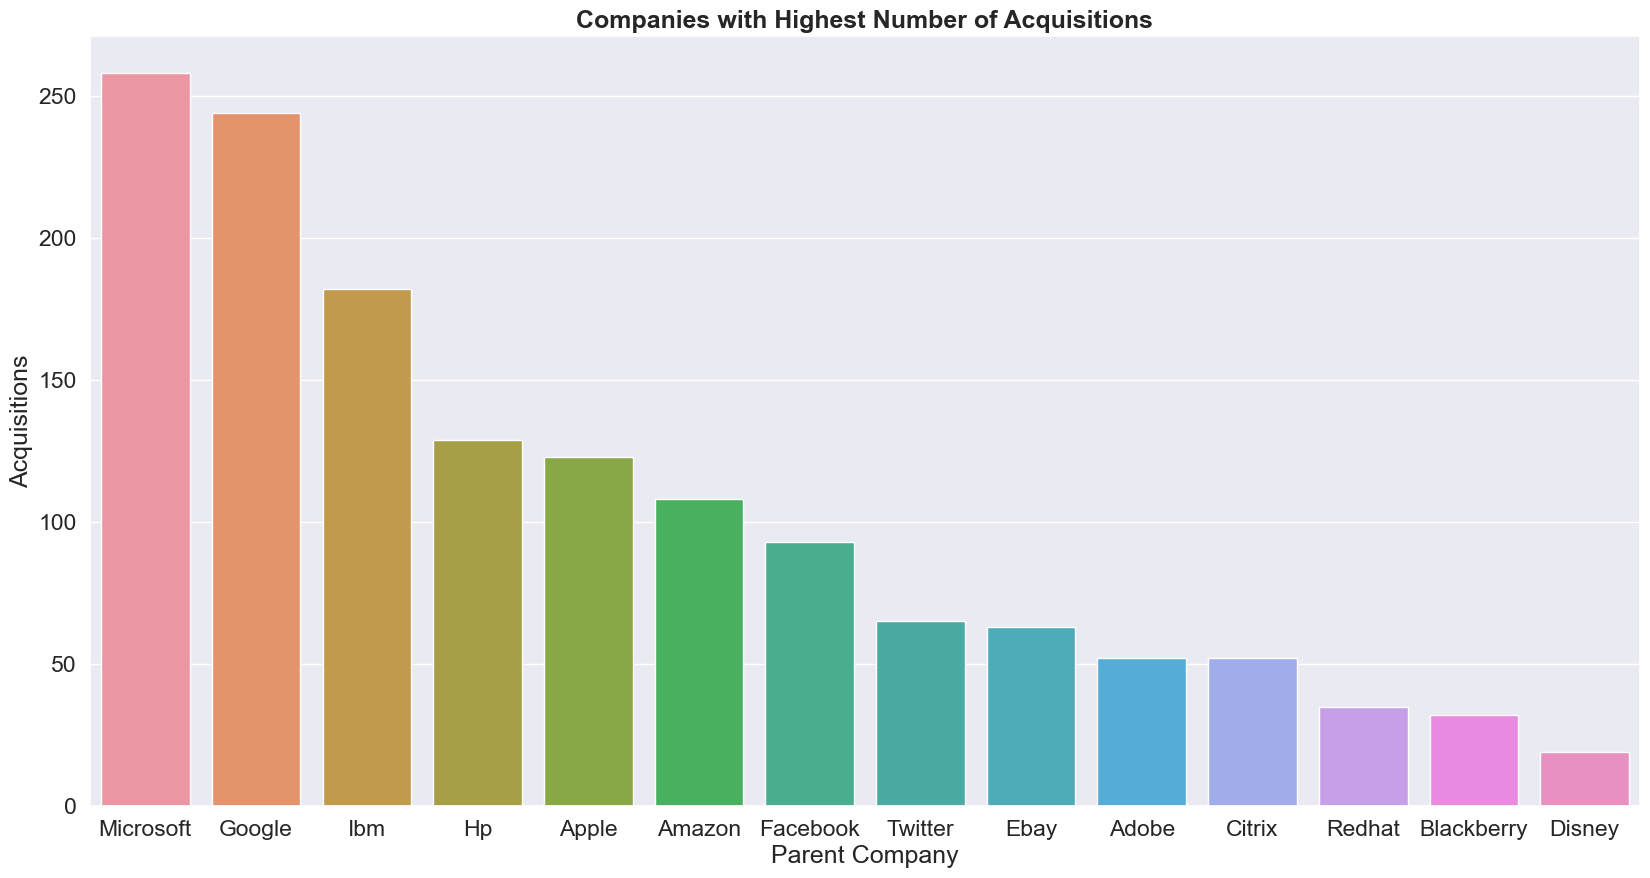

In [16]:
# Which companies have had the highest numbers of acquisitions
companies = df['Parent Company'].value_counts() #getting frequency of Parent Companys occuring
companies_df = companies.to_frame().reset_index() # converting companies series to DataFrame
companies_df = companies_df.rename({'index': 'Parent Company', 'Parent Company': 'Acquisitions'}, axis=1)
plt.figure(figsize=(20,10))
plt.title('Companies with Highest Number of Acquisitions', fontweight="bold")
sns.barplot(x='Parent Company', y='Acquisitions', data=companies_df)


In [17]:
# User-Defined Custom function for locating an inputed Value in the Parent Company Category
def my_function(Company):
    Company = df.loc[df["Parent Company"] == Company]
    return Company


<AxesSubplot:title={'center':'Apples Most Popular Businesses To Acquire'}, xlabel='Total', ylabel='Business'>

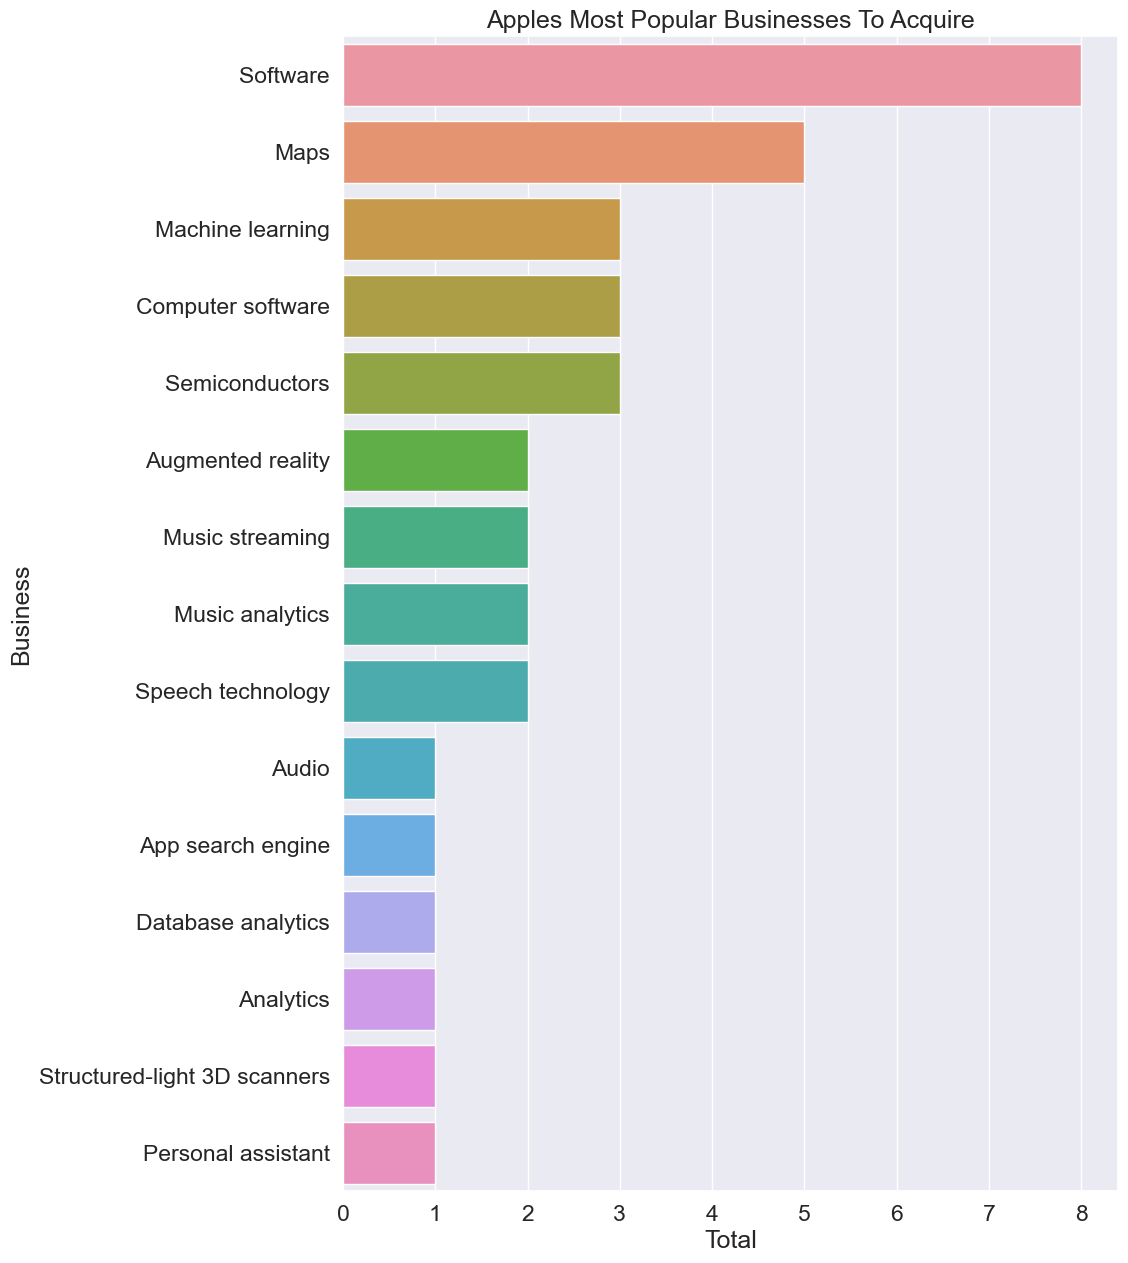

In [18]:
# Plotting What types of Business Apple is acquiring most of
Apple = my_function("Apple")
business = Apple['Business'].value_counts()
business_df = business.to_frame().reset_index()
business_df = business_df.rename({'index': 'Business', 'Business': 'Total'}, axis=1)
plt.figure(figsize=(10,15))
plt.title('Apples Most Popular Businesses To Acquire')
sns.barplot(x='Total', y='Business', data=business_df[:15])

<AxesSubplot:title={'center':'Microsofts Most Popular Businesses To Acquire'}, xlabel='Total', ylabel='Business'>

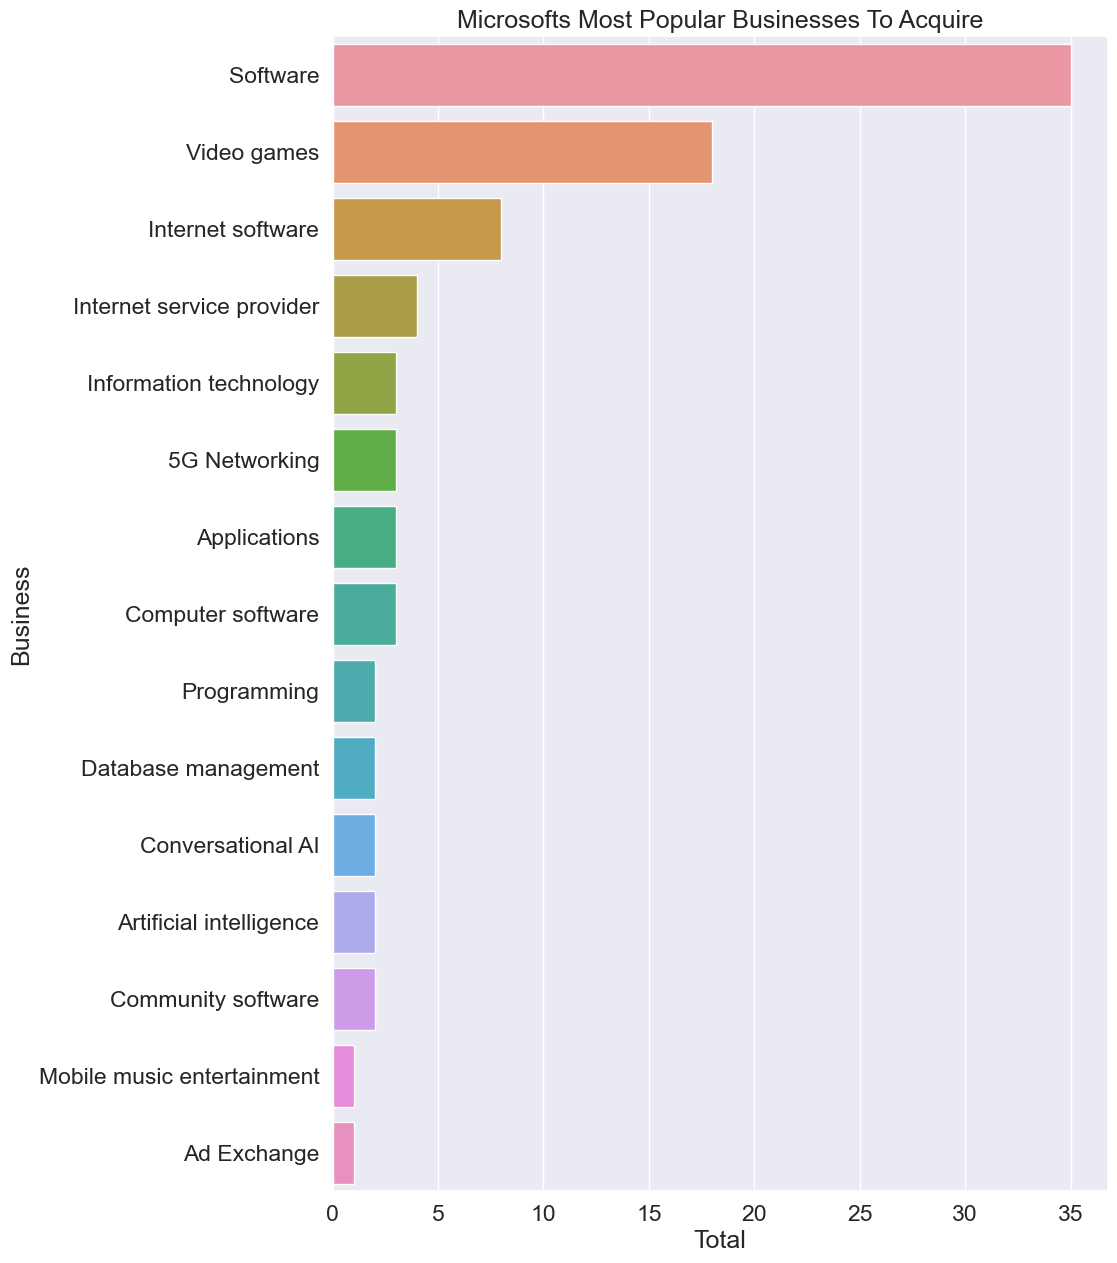

In [19]:
# Plotting What types of Business Microsoft is acquiring most of
Microsoft = my_function("Microsoft")
business2 = Microsoft['Business'].value_counts()
business_df2 = business2.to_frame().reset_index()
business_df2 = business_df2.rename({'index': 'Business', 'Business': 'Total'}, axis=1)
plt.figure(figsize=(10,15))
plt.title('Microsofts Most Popular Businesses To Acquire')
sns.barplot(x='Total', y='Business', data=business_df2[:15])

In [20]:
business_df2.head()

Business  Total
0                   Software     35
1                Video games     18
2          Internet software      8
3  Internet service provider      4
4     Information technology      3

In [21]:
# Merging two DataFrames together
business_df.merge(business_df2,how='outer',left_on=['Business','Total'],right_on=['Business','Total'])

Business  Total
0                     Software      8
1                         Maps      5
2             Machine learning      3
3            Computer software      3
4               Semiconductors      3
..                         ...    ...
279            Data protection      1
280         Big data analytics      1
281      Mobile communications      1
282  Customer service software      1
283       PC database software      1

[284 rows x 2 columns]

In [22]:
# Concating two DataFrames Together - opting for only the top 5 most popular acquired businesses of both Apple and Microsoft
result = pd.concat([business_df.head(), business_df2.head()], keys=["Apple","Microsoft"])
result.index.names = ["Company","ID"]
result.sort_values("Total").max()
print(result)

                               Business  Total
Company   ID                                  
Apple     0                    Software      8
          1                        Maps      5
          2            Machine learning      3
          3           Computer software      3
          4              Semiconductors      3
Microsoft 0                    Software     35
          1                 Video games     18
          2           Internet software      8
          3   Internet service provider      4
          4      Information technology      3


Text(0.5, 1.0, 'Microsofts and Apples Most Popular Businesses To Acquire')

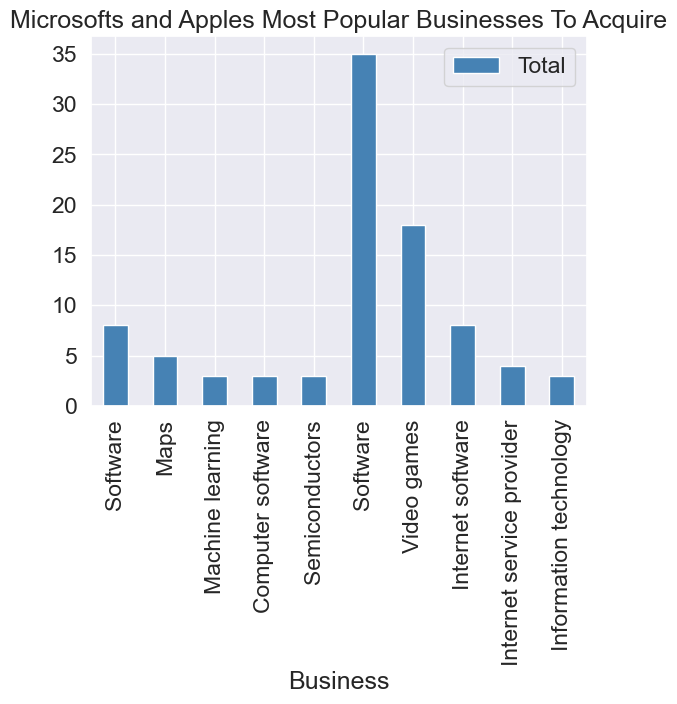

In [23]:
# Barchart displaying the top 5 most popular businesses acquired by both Apple and Microsoft
# Still requires cleaning of BarChart
result.set_index("Business").plot(kind = "bar", stacked = True, color=['steelblue', 'red'])
plt.title('Microsofts and Apples Most Popular Businesses To Acquire')

## Failed attempts at stacked bar chart - Comparing Microsoft and Apples most popular businesses to acquire

In [24]:
#sns.barplot(data = result, x= "Business", y = "Total", )
#plt.figure(figsize=(15,30))
#plt.show()


#result.transpose().plot("Total",title="Test")

In [25]:
#fig = plt.figure()

#for frame in [business_df, business_df2]:
   # plt.plot(frame['Total'], frame['Business'])
     #sns.barplot(x="Business", y="Total", 
            #   data=frame)
#g.fig.set_size_inches(15, 8)
   # plt.show()
#plt.xlim(0,20)
#plt.ylim(0,30)
#plt.show()

In [26]:
#business_df["key"] = "Apple"
#business_df2["Key"] = "Microsoft"
#result = pd.concat([business_df.head(), business_df2.head()], keys=["Apple","Microsoft"])
#DFGroup = result.groupby(["Business", "Key"])
#DFGPlot = DFGroup.sum().unstack('Key').plot(kind='bar')

In [27]:
#g = sns.barplot(x="Business", y="Total", 
               #data=pd.concat([business_df, business_df2], keys=["Apple","Microsoft"]), fit_reg=True)
#g.fig.set_size_inches(15, 8)
#plt.show()

In [28]:
# df["Company Stock Value"]


In [29]:
# import requests
# import yfinance as yf

In [30]:
# conda install -c ranaroussi yfinance

In [31]:
# Graph to show the average amount of money each company spends on an Acquisition
companies_grouped = df.groupby(["Parent Company"]).mean()
companies_grouped = companies_grouped.reset_index()
#Removing Disney as an outlier
companies_grouped2 = companies_grouped[companies_grouped["Acquisition Price"] < 3000000000]
companies_grouped2 = companies_grouped2.reset_index()

In [32]:
companies_grouped2

index Parent Company  Acquisition Price
0       0          Adobe       3.208220e+08
1       1         Amazon       3.039426e+08
2       2          Apple       4.260997e+07
3       3     Blackberry       7.559766e+07
4       4         Citrix       0.000000e+00
5       6           Ebay       2.282381e+08
6       7       Facebook       2.609108e+08
7       8         Google       3.468934e+07
8       9             Hp       5.894913e+08
9      10            Ibm       3.860879e+08
10     11      Microsoft       3.924886e+08
11     12         Redhat       6.766060e+07
12     13        Twitter       7.958949e+08

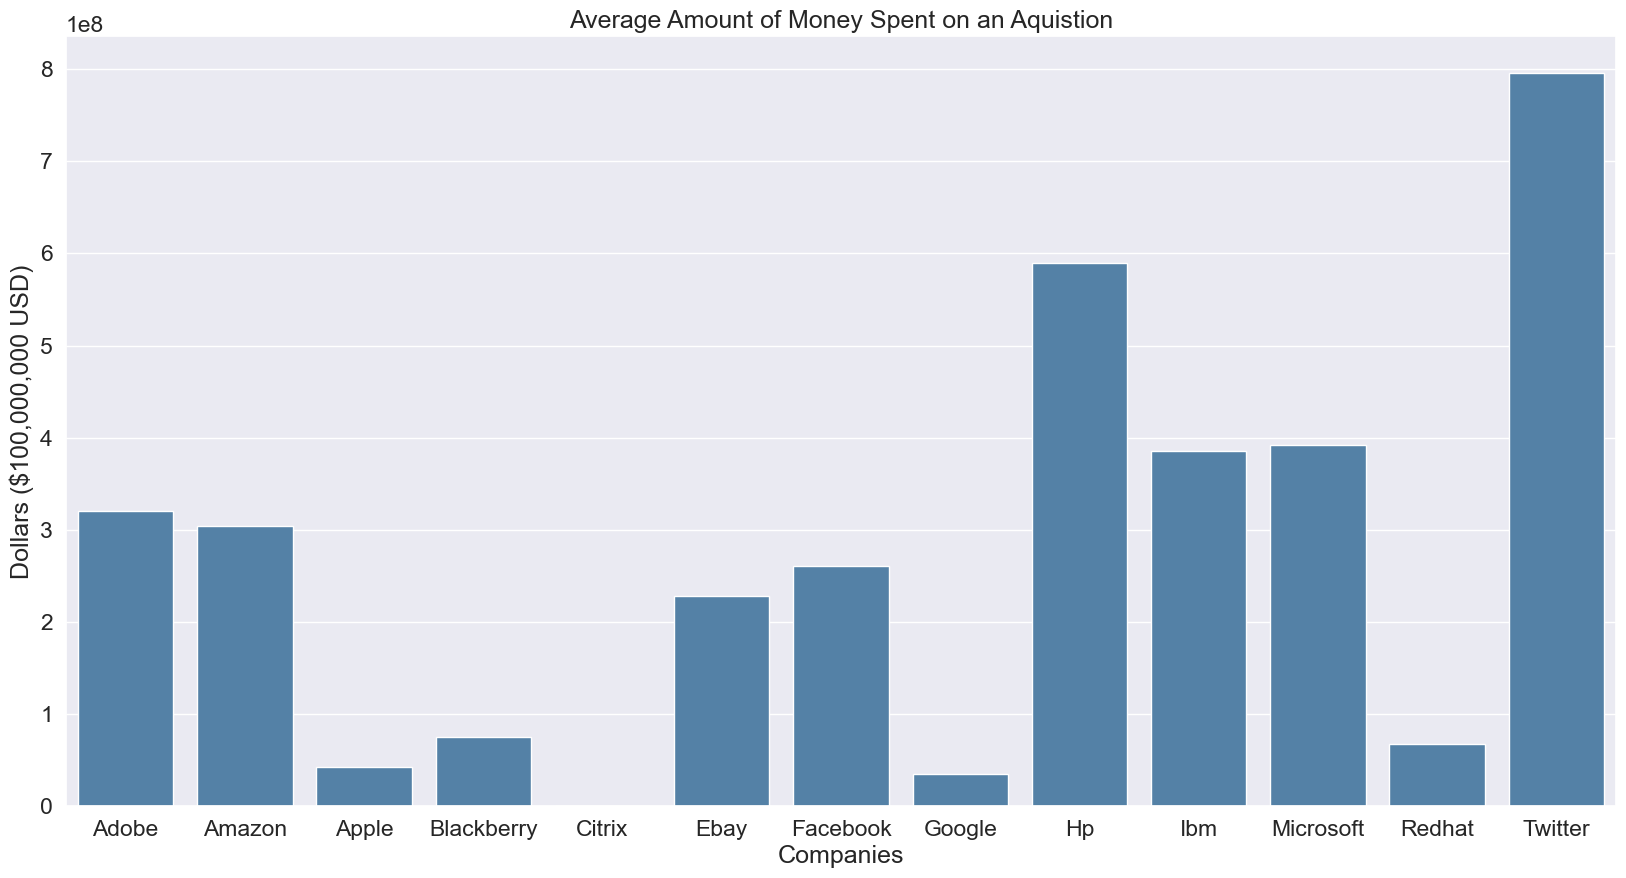

In [33]:

plt.figure(figsize=(20,10))
sns.barplot(x= "Parent Company", y='Acquisition Price', data=companies_grouped2, color="steelblue", fill=True)
plt.xlabel('Companies')
plt.ylabel('Dollars ($100,000,000 USD)')
plt.title('Average Amount of Money Spent on an Aquistion')


# Display the chart
plt.show()

In [34]:
# In what month/season are there most acquisitions

# Group the data by the month column and quarter column and count the number of columns in each group
monthly_acquisition_counts = df.groupby(['Acquisition Month']).size()
monthly_acquisition_counts
#removing the null value 
monthly_acquisition_counts = monthly_acquisition_counts.drop(monthly_acquisition_counts.index[0])
monthly_acquisition_counts

Acquisition Month
Apr    122
Aug    114
Dec    105
Feb     98
Jan    115
Jul    126
Jun    148
Mar    106
May    125
Nov     94
Oct    119
Sep    125
dtype: int64

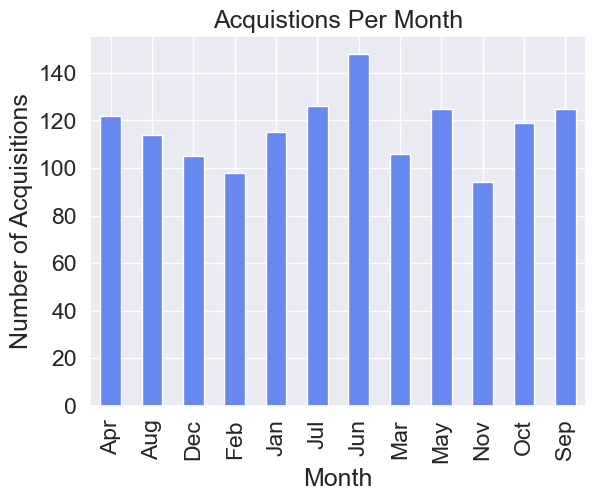

In [35]:
monthly_acquisition_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Acquisitions')
plt.title('Acquistions Per Month')
plt.show()

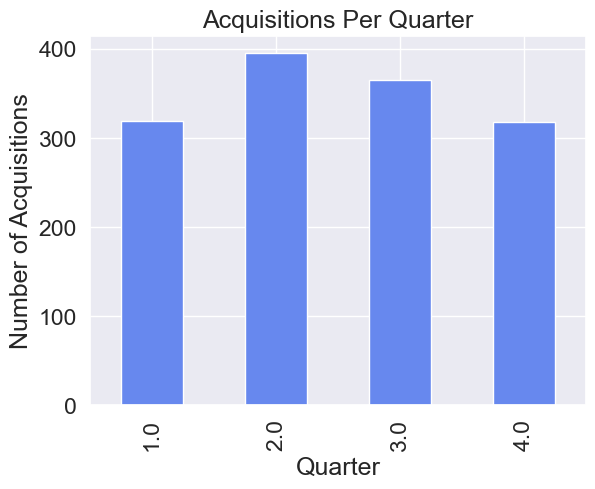

In [36]:
quarter_map = {'Jan':1,'Feb':1,'Mar':1,'Apr':2,'May':2,'Jun':2,'Jul':3,'Aug':3,'Sep':3,'Oct':4,'Nov':4,'Dec':4}
df['Quarter'] = df['Acquisition Month'].map(quarter_map)
quarterly_acquisition_counts = df.groupby(['Quarter']).size()

quarterly_acquisition_counts.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Number of Acquisitions')
plt.title('Acquisitions Per Quarter')
plt.show()

In [37]:
# Number of aquisitions per year
# Replacing all AI related fields with generic AI - to see if there has been an increase in AI related acquisitions in recent years